<h1 align='center'>Data Exploration & Cleaning</h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('WPPOOL.csv')

In [4]:
df.head()

,user_id,install_date,last_active_date,subscription_type,country,total_sessions,page_views,download_clicks,activation_status,days_active,pro_upgrade_date,plan_type,monthly_revenue,churned
0,1,6/29/2023,7/12/2023,Free,UK,3,15,1,1,13,NaN,NaN,0,1
1,2,4/10/2023,7/25/2023,Free,India,133,665,0,1,106,NaN,NaN,0,0
2,3,10/25/2023,12/7/2023,Free,USA,53,106,0,1,43,NaN,NaN,0,0
3,4,8/26/2023,11/9/2023,Pro,Canada,242,242,0,1,75,11/9/2023,Basic,49,0
4,5,5/14/2023,11/22/2023,Free,UK,12,48,0,1,192,NaN,NaN,0,0


In [5]:
df.isnull().sum()

user_id                  0
install_date             0
last_active_date         0
subscription_type        0
country                  0
total_sessions           0
page_views               0
download_clicks          0
activation_status        0
days_active              0
pro_upgrade_date     15971
plan_type            15971
monthly_revenue          0
churned                  0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df['plan_type'].fillna('Never Upgraded', inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_11368\1053514796.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['plan_type'].fillna('Never Upgraded', inplace=True)


In [8]:
df.head()

,user_id,install_date,last_active_date,subscription_type,country,total_sessions,page_views,download_clicks,activation_status,days_active,pro_upgrade_date,plan_type,monthly_revenue,churned
0,1,6/29/2023,7/12/2023,Free,UK,3,15,1,1,13,NaN,Never Upgraded,0,1
1,2,4/10/2023,7/25/2023,Free,India,133,665,0,1,106,NaN,Never Upgraded,0,0
2,3,10/25/2023,12/7/2023,Free,USA,53,106,0,1,43,NaN,Never Upgraded,0,0
3,4,8/26/2023,11/9/2023,Pro,Canada,242,242,0,1,75,11/9/2023,Basic,49,0
4,5,5/14/2023,11/22/2023,Free,UK,12,48,0,1,192,NaN,Never Upgraded,0,0


In [9]:
df.dtypes

user_id               int64
install_date         object
last_active_date     object
subscription_type    object
country              object
total_sessions        int64
page_views            int64
download_clicks       int64
activation_status     int64
days_active           int64
pro_upgrade_date     object
plan_type            object
monthly_revenue       int64
churned               int64
dtype: object

In [10]:
df['user_id'] = df['user_id'].astype('str')

In [11]:
date_columns = ['install_date', 'last_active_date', 'pro_upgrade_date']

# Convert only the Date Columns
df[date_columns] = df[date_columns].apply(pd.to_datetime)

In [12]:
df.dtypes

user_id                      object
install_date         datetime64[ns]
last_active_date     datetime64[ns]
subscription_type            object
country                      object
total_sessions                int64
page_views                    int64
download_clicks               int64
activation_status             int64
days_active                   int64
pro_upgrade_date     datetime64[ns]
plan_type                    object
monthly_revenue               int64
churned                       int64
dtype: object

<h1 align='center'>Summary of the dataset, including the distribution of Free vs. Pro users.</h1>

In [13]:
d = ['total_sessions','page_views','days_active']
d = df.groupby('subscription_type')[d].describe()
d = pd.DataFrame(d)
d.transpose()

subscription_type             Free          Pro
total_sessions count  15971.000000  4029.000000
               mean      76.081210   154.677836
               std       43.157555    84.204968
               min        1.000000    10.000000
               25%       39.000000    81.000000
               50%       76.000000   154.000000
               75%      114.000000   227.000000
               max      150.000000   300.000000
page_views     count  15971.000000  4029.000000
               mean     228.628326   465.315215
               std      179.161547   354.213590
               min        1.000000    10.000000
               25%       85.000000   183.000000
               50%      178.000000   368.000000
               75%      343.000000   672.000000
               max      750.000000  1500.000000
days_active    count  15971.000000  4029.000000
               mean      91.222528    91.511790
               std       80.722314    80.503925
               min        0.000000     0.000000
               25%       24.000000    25.000000
               50%       68.000000    68.000000
               75%      139.000000   142.000000
               max      364.000000   362.000000

In [14]:
b = df.groupby('subscription_type').agg({'user_id':'count','total_sessions': 'mean','page_views':['mean', 'sum'],'monthly_revenue':['mean', 'sum'],'churned':'count'}).assign(
    user_percentage=lambda x: x['user_id']/df['user_id'].count() * 100).round(2)
b = pd.DataFrame(b).reset_index() #RESET THE COLUMNS NAME AND INDEX
b.columns = ['subscription_type', 'user_count', 'avg_total_sessions', 'avg_page_views','total_page_views','avg_monthly_revenue','total_monthly_revenue','churned','user_percentage']
b.transpose()

,0,1
subscription_type,Free,Pro
user_count,15971,4029
avg_total_sessions,76.08,154.68
avg_page_views,228.63,465.32
total_page_views,3651423,1874755
avg_monthly_revenue,0.0,58.45
total_monthly_revenue,0,235481
churned,15971,4029
user_percentage,79.86,20.14


<h1 align='center'>User Engagement Analysis</h1>

C:\Users\USER\AppData\Local\Temp\ipykernel_11368\2813841426.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ses_avg.index, y=ses_avg.values, palette='viridis')


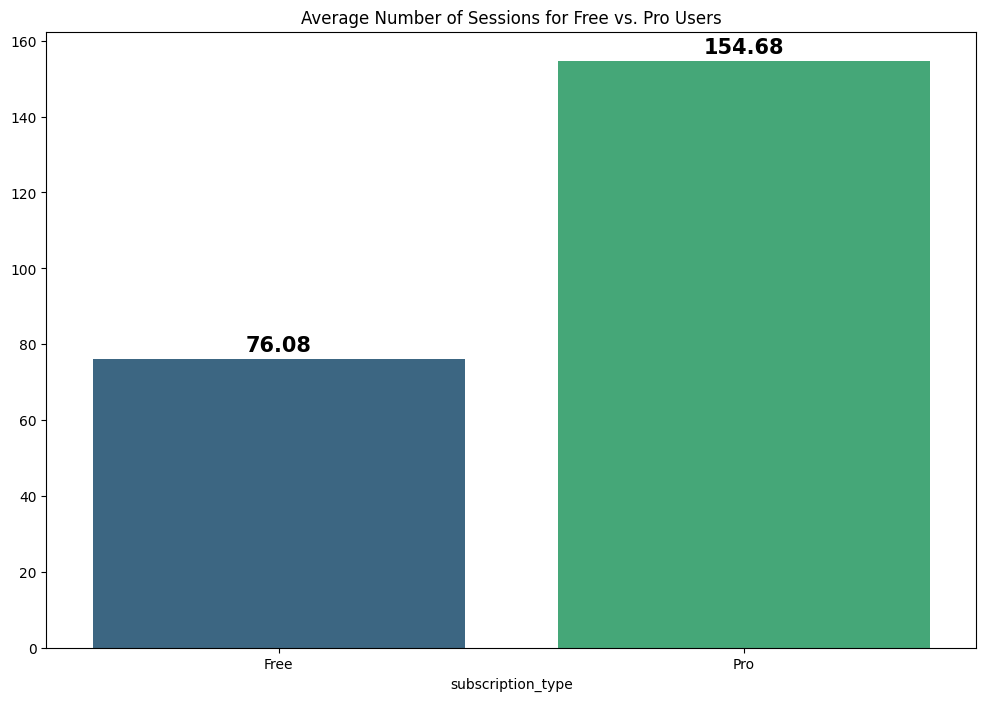

In [15]:
#Identify the average number of sessions for Free vs. Pro users
ses_avg = df.groupby('subscription_type')['total_sessions'].mean()
plt.figure(figsize=(12,8))
sns.barplot(x=ses_avg.index, y=ses_avg.values, palette='viridis')
plt.title('Average Number of Sessions for Free vs. Pro Users')
for i, v in enumerate(ses_avg):
    plt.text(i, v+2, f"{v:.2f}", ha='center',weight='bold',size=15)
plt.savefig("average number of sessions for Free vs. Pro users.jpg", format="jpg", dpi=300)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_11368\2189880569.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_n, x='user_id', y='total_sessions',palette='viridis')


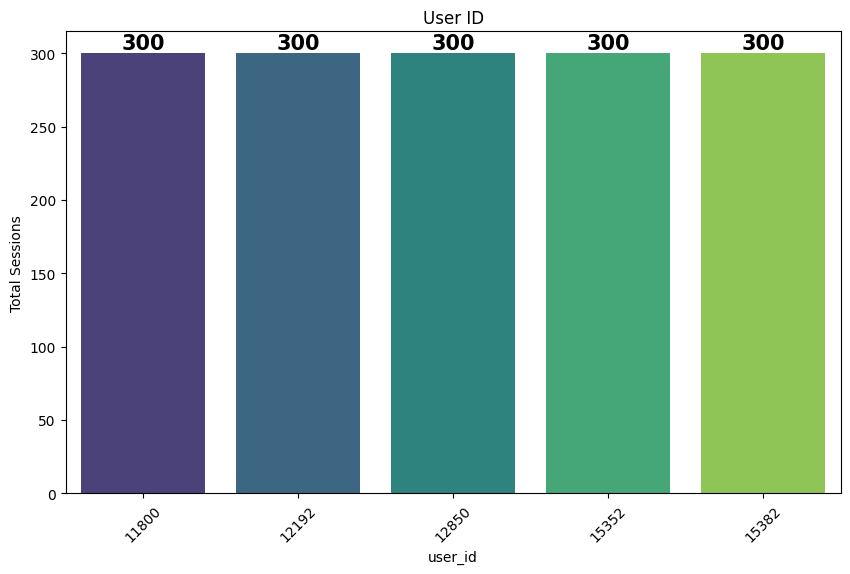

In [37]:
#Find the top 5 most active users based on total sessions
top = df.groupby('user_id')['total_sessions'].sum().reset_index()
top_n = top.nlargest(5,'total_sessions')
plt.figure(figsize=(10,6))
sns.barplot(data=top_n, x='user_id', y='total_sessions',palette='viridis')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.title('User ID')
plt.ylabel('Total Sessions')
for i, v in enumerate(top_n['total_sessions']):
    plt.text(i, v+3, str(v), ha='center',weight='bold',size=15)
plt.savefig("top 5 most active users based on total sessions.jpg", format="jpg", dpi=300)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_11368\2023315450.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_country, x='country', y='total_sessions',palette='viridis')


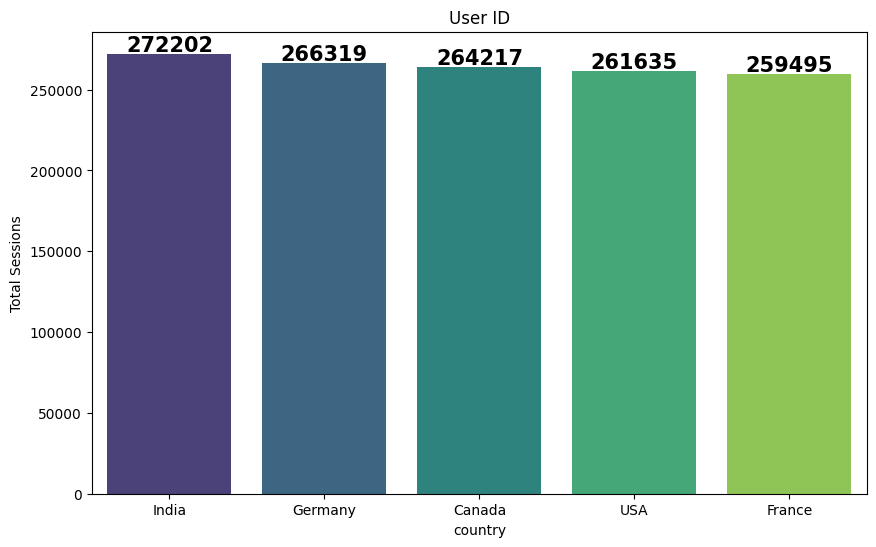

In [39]:
#Identify the top 5 countries with the highest engagement.
top = df.groupby('country')['total_sessions'].sum().reset_index()
top_country = top.nlargest(5,'total_sessions')
plt.figure(figsize=(10,6))
sns.barplot(data=top_country, x='country', y='total_sessions',palette='viridis')
plt.title('User ID')
plt.ylabel('Total Sessions')
for i, v in enumerate(top_country['total_sessions']):
    plt.text(i, v+1500, str(v), ha='center',weight='bold',size=15)
plt.savefig("top 5 countries with the highest engagement.jpg", format="jpg", dpi=300)
plt.show()

In [18]:
df['country'].unique()

array(['UK', 'India', 'USA', 'Canada', 'Germany', 'Australia', 'France'],
      dtype=object)

<h1 align='center'> Churn Analysis </h1>

In [19]:
df['churned_updated'] = df['churned'].map({0:'Still active', 1:'User has churned'})

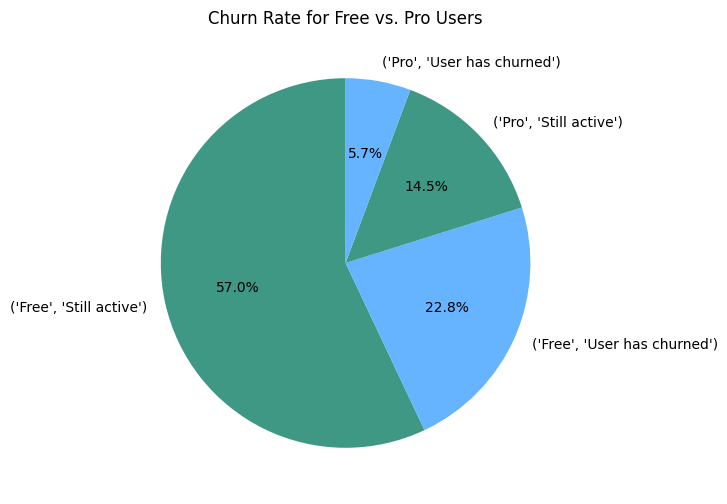

In [40]:
# Calculate the overall churn rate for Free vs. Pro users
churn_rate = df.groupby(['subscription_type','churned_updated'])['churned'].count()/df['churned'].count() * 100
plt.figure(figsize=(10,6))
plt.pie(churn_rate, labels=churn_rate.index, autopct='%1.1f%%', startangle=90, colors=['#3E9883','#66b3ff'])
plt.title('Churn Rate for Free vs. Pro Users')
plt.savefig("churn rate for Free vs. Pro users.jpg", format="jpg", dpi=300)
plt.show()

In [21]:
#Identify the top 3 factors contributing to churn using correlation or regression analysis
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [22]:
contingency_table = pd.crosstab(df['subscription_type'], df['churned_updated'])
chi2_contingency(contingency_table)
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")
print("\nExpected frequencies:")
print(expected)

Chi-square statistic: 0.1769
P-value: 0.6740
Degrees of freedom: 1

Expected frequencies:
[[11415.27225  4555.72775]
 [ 2879.72775  1149.27225]]


In [23]:
category = ['subscription_type','country','plan_type']
chi2_results = []# Store values
for features in category:
    contingency_table = pd.crosstab(df[features], df['churned_updated'])
    chi_square, p, dof, expected = chi2_contingency(contingency_table)
    # Append results to the list
    chi2_results.append([features, chi_square, p, dof, expected])

# Convert to DataFrame
chi2_results_df = pd.DataFrame(chi2_results, columns=['Feature', 'Chi2 Statistic', 'P-Value', 'Degrees of Freedom', 'Expected Frequencies'])
chi2_results_df

,Feature,Chi2 Statistic,P-Value,Degrees of Freedom,Expected Frequencies
0,subscription_type,0.176902,0.674049,1,"[[11415.27225, 4555.72775], [2879.72775, 1149...."
1,country,3.446887,0.751022,6,"[[1993.43775, 795.56225], [2072.06025, 826.939..."
2,plan_type,1.199166,0.753204,3,"[[972.77475, 388.22525], [954.906, 381.094], [..."


In [24]:
df.head()

,user_id,install_date,last_active_date,subscription_type,country,total_sessions,page_views,download_clicks,activation_status,days_active,pro_upgrade_date,plan_type,monthly_revenue,churned,churned_updated
0,1,2023-06-29,2023-07-12,Free,UK,3,15,1,1,13,NaT,Never Upgraded,0,1,User has churned
1,2,2023-04-10,2023-07-25,Free,India,133,665,0,1,106,NaT,Never Upgraded,0,0,Still active
2,3,2023-10-25,2023-12-07,Free,USA,53,106,0,1,43,NaT,Never Upgraded,0,0,Still active
3,4,2023-08-26,2023-11-09,Pro,Canada,242,242,0,1,75,2023-11-09,Basic,49,0,Still active
4,5,2023-05-14,2023-11-22,Free,UK,12,48,0,1,192,NaT,Never Upgraded,0,0,Still active


In [25]:
#Compare churn trends between Free and Pro users.
df['last_Active_Month'] = df['last_active_date'].dt.strftime('%b')
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['last_Active_Month'] = pd.Categorical(df['last_Active_Month'], categories=month_order, ordered=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_11368\2354804814.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_trend = df.groupby(['last_Active_Month','subscription_type'])['churned'].count().unstack()


<Figure size 1400x800 with 0 Axes>

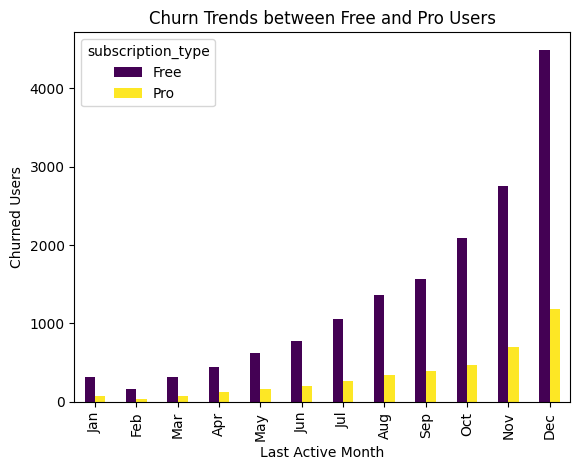

In [26]:
churn_trend = df.groupby(['last_Active_Month','subscription_type'])['churned'].count().unstack()
plt.figure(figsize=(14,8))
churn_trend.plot(kind='bar', colormap='viridis')
plt.title('Churn Trends between Free and Pro Users')
plt.xlabel('Last Active Month')
plt.ylabel('Churned Users')
plt.show()

<h1 align='center'> Revenue & Upgrade Trends </h1>

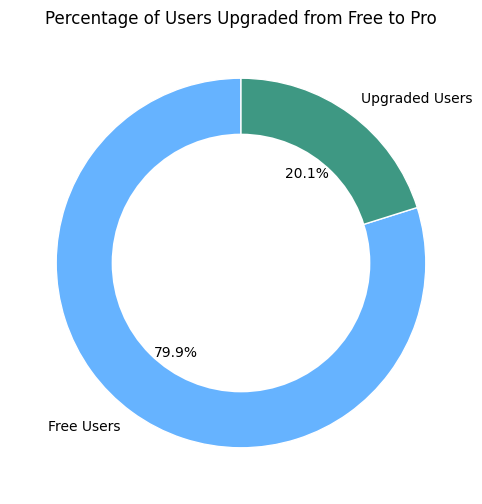

In [27]:
#1.What percentage of users upgraded from Free to Pro?
free_users = df[df['subscription_type'] == 'Free']['user_id'].count()
upgraded_users = df['user_id'].nunique()-free_users
categories = ['Free Users', 'Upgraded Users']
values = [free_users, upgraded_users]
percentages = [v / sum(values) * 100 for v in values]
plt.figure(figsize=(8,6))
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#3E9883'], wedgeprops={'edgecolor': 'white'})
centre_circle = plt.Circle((0,0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Percentage of Users Upgraded from Free to Pro')
plt.show()

In [28]:
# Count the number of unique Free users
free_users = df[df['subscription_type'] == 'Free']['user_id'].nunique()
upgraded_users = df[df['pro_upgrade_date'].notna()]['user_id'].nunique()
upgrade_percentage = (upgraded_users / free_users * 100)
print(f"Percentage of Free users who upgraded to Pro: {upgrade_percentage:.2f}%")

Percentage of Free users who upgraded to Pro: 25.23%


C:\Users\USER\AppData\Local\Temp\ipykernel_11368\2048982138.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pro_revenue_monthly = df[df['subscription_type'] == 'Pro'].groupby('Pro_Month')['monthly_revenue'].sum()


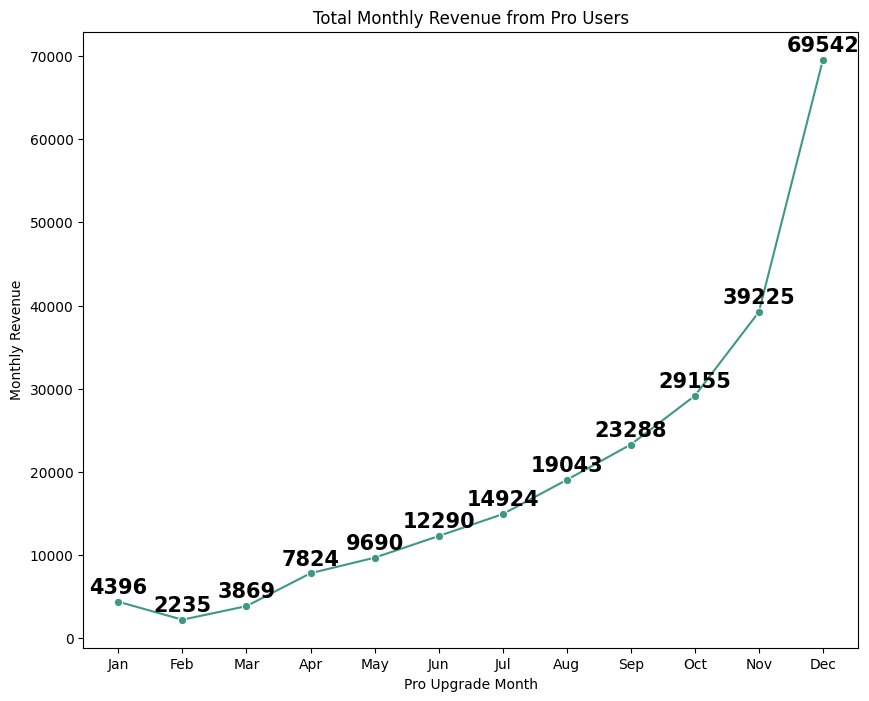

In [29]:
#2.Calculate the total monthly revenue from Pro users
df['Pro_Month'] = df['pro_upgrade_date'].dt.strftime('%b')
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['Pro_Month'] = pd.Categorical(df['Pro_Month'], categories=month_order, ordered=True)
pro_revenue_monthly = df[df['subscription_type'] == 'Pro'].groupby('Pro_Month')['monthly_revenue'].sum()
# Plotting the total monthly revenue from Pro users
plt.figure(figsize=(10,8))
sns.lineplot(x=pro_revenue_monthly.index, y=pro_revenue_monthly.values, marker='o', color='#3E9883')
plt.title('Total Monthly Revenue from Pro Users')
plt.xlabel('Pro Upgrade Month')
plt.ylabel('Monthly Revenue')
for i, v in enumerate(pro_revenue_monthly):
    plt.text(i, v+1000, str(v), ha='center',weight='bold',size=15)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_11368\3301057552.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plan_revenue.index, y=plan_revenue.values, palette='viridis')


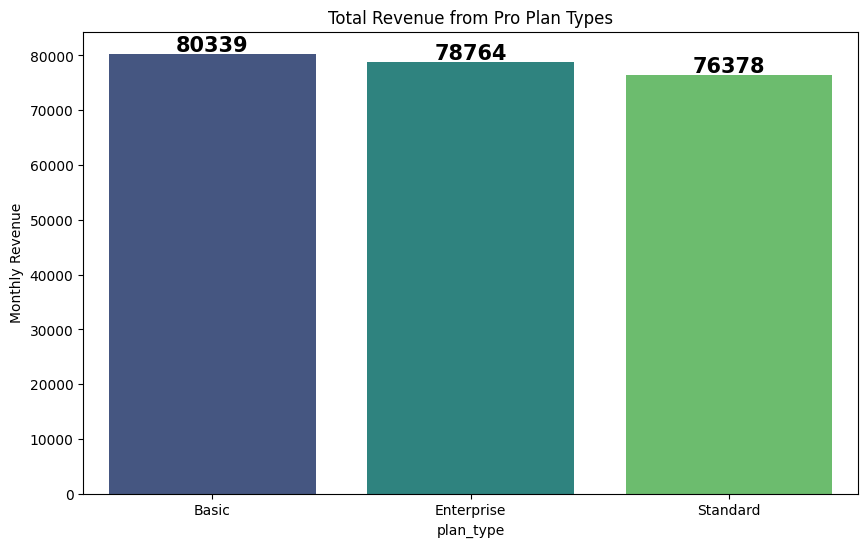

In [30]:
#3.Which Pro plan (Basic, Standard, or Enterprise) contributes the most revenue?
plan_revenue = df[df['subscription_type'] == 'Pro'].groupby('plan_type')['monthly_revenue'].sum()
plt.figure(figsize=(10,6))
sns.barplot(x=plan_revenue.index, y=plan_revenue.values, palette='viridis')
plt.title('Total Revenue from Pro Plan Types')
plt.ylabel('Monthly Revenue')
for i, v in enumerate(plan_revenue):
    plt.text(i, v+500, str(v), ha='center',weight='bold',size=15)
plt.show()

In [31]:
#4.Analyze how long it takes for Free users to upgrade based on country and engagement level.
df['days_diff_to_upgrade'] = (df['pro_upgrade_date'] - df['install_date']).dt.days
df['days_diff_to_upgrade'] = df['days_diff_to_upgrade'].fillna(0).astype(int)

C:\Users\USER\AppData\Local\Temp\ipykernel_11368\572445543.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=avg_days_to_upgrade, x='country', y='days_diff_to_upgrade', palette='viridis')


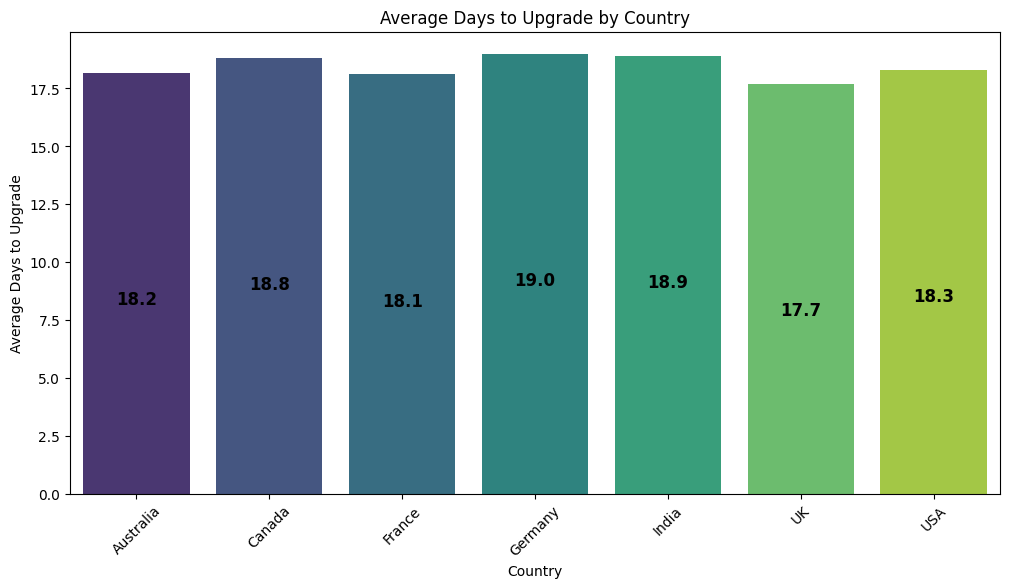

In [32]:
avg_days_to_upgrade = df.groupby('country')['days_diff_to_upgrade'].mean().reset_index()

plt.figure(figsize=(12,6))
ax = sns.barplot(data=avg_days_to_upgrade, x='country', y='days_diff_to_upgrade', palette='viridis')
for i, v in enumerate(avg_days_to_upgrade['days_diff_to_upgrade']):
    ax.text(i, v-10, f"{v:.1f}", ha='center', weight='bold', size=12)

plt.title('Average Days to Upgrade by Country')
plt.xlabel('Country')
plt.ylabel('Average Days to Upgrade')
plt.xticks(rotation=45)
plt.show()

In [33]:
new_conversion_rate = 1.10*upgrade_percentage
new_pro_upgrades = (new_conversion_rate / 100) * free_users
additional_pro_upgrades = new_pro_upgrades - upgraded_users

# Display results
print(f"Current Conversion Rate: {upgrade_percentage:.2f}%")
print(f"New Conversion Rate (after 10% increase): {new_conversion_rate:.2f}%")
print(f"Estimated New Pro Upgrades: {new_pro_upgrades:.0f}")
print(f"Additional Pro Upgrades: {additional_pro_upgrades:.0f}")

Current Conversion Rate: 25.23%
New Conversion Rate (after 10% increase): 27.75%
Estimated New Pro Upgrades: 4432
Additional Pro Upgrades: 403


<h1 align='center'>Variations</h1>

In [34]:
df.head()

,user_id,install_date,last_active_date,subscription_type,country,total_sessions,page_views,download_clicks,activation_status,days_active,pro_upgrade_date,plan_type,monthly_revenue,churned,churned_updated,last_Active_Month,Pro_Month,days_diff_to_upgrade
0,1,2023-06-29,2023-07-12,Free,UK,3,15,1,1,13,NaT,Never Upgraded,0,1,User has churned,Jul,NaN,0
1,2,2023-04-10,2023-07-25,Free,India,133,665,0,1,106,NaT,Never Upgraded,0,0,Still active,Jul,NaN,0
2,3,2023-10-25,2023-12-07,Free,USA,53,106,0,1,43,NaT,Never Upgraded,0,0,Still active,Dec,NaN,0
3,4,2023-08-26,2023-11-09,Pro,Canada,242,242,0,1,75,2023-11-09,Basic,49,0,Still active,Nov,Nov,75
4,5,2023-05-14,2023-11-22,Free,UK,12,48,0,1,192,NaT,Never Upgraded,0,0,Still active,Nov,NaN,0


In [35]:
df.groupby(['plan_type','country'])[['monthly_revenue','total_sessions','page_views']].var().reindex(['Basic','Standard','Enterprise','Never Upgraded'],level=0)
# level=0 to reorder only the plan_type level while keeping country sorted within each plan type.

monthly_revenue  total_sessions     page_views
plan_type      country                                                  
Basic          Australia       861.901198     6930.928108  131424.582514
               Canada          762.786784     7380.430640  138244.960980
               France          867.578800     7350.473230  141386.975551
               Germany         846.971618     7001.920915  134864.752824
               India           905.565149     6904.889691  140212.797148
               UK              795.055239     6296.807526  114882.579235
               USA             898.363480     7860.239707  115453.747459
Standard       Australia       891.321244     6348.831066  107049.517433
               Canada          735.804407     7916.285105  138535.560166
               France          766.991774     7677.423443  113530.037427
               Germany         844.151454     6813.925891  109817.433280
               India           849.217860     6914.968352  111805.811199
               UK              882.362996     7118.183932  131757.699731
               USA             870.152799     7183.585580  125058.321456
Enterprise     Australia       948.910615     7552.617598  137202.503880
               Canada          795.139157     7009.804188  113631.518214
               France          854.940835     6593.853226  143631.282512
               Germany         859.342617     6778.313849  126668.389465
               India           838.099108     6817.871238  126613.804763
               UK              875.800269     8014.606495  133536.422408
               USA             859.735605     6492.446710  101430.459871
Never Upgraded Australia         0.000000     1808.887030   29789.760642
               Canada            0.000000     1845.545749   32654.835521
               France            0.000000     1845.068932   31992.635850
               Germany           0.000000     1880.774984   32945.782395
               India             0.000000     1868.626823   32004.172747
               UK                0.000000     1832.102328   32236.381488
               USA               0.000000     1959.908360   33087.545935

In [36]:
df.groupby(['country','churned_updated'])[['churned']].count()

churned
country   churned_updated          
Australia Still active         1968
          User has churned      821
Canada    Still active         2053
          User has churned      846
France    Still active         2057
          User has churned      792
Germany   Still active         2045
          User has churned      787
India     Still active         2082
          User has churned      832
UK        Still active         2045
          User has churned      824
USA       Still active         2045
          User has churned      803